In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [76]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [77]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273284 entries, 0 to 1273283
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1273284 non-null  int64  
 1   kWh       1273284 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 19.4 MB


In [78]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1273279    0.19
1273280    0.19
1273281    0.15
1273282    0.13
1273283    0.13
Name: kWh, Length: 1273284, dtype: float64

In [79]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1273279    0.19
1273280    0.19
1273281    0.15
1273282    0.13
1273283    0.13
Name: kWh, Length: 1273284, dtype: float64

In [80]:
l=len(conso_data)-1
l

1273283

In [81]:
conso_data['sec']=conso_data['Interval']/1000


In [82]:
conso_data['Wh']=3600000/conso_data['Interval']


In [83]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [84]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273284 entries, 0 to 1273283
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1273284 non-null  int64  
 1   kWh        1273284 non-null  float64
 2   sec        1273284 non-null  float64
 3   Wh         1273284 non-null  float64
 4   cumul(ms)  1273284 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 48.6 MB


In [85]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1273279,18588,0.19,18.588,193.673338,30047587935
1273280,18564,0.19,18.564,193.923723,30047606499
1273281,23509,0.15,23.509,153.132843,30047630008
1273282,28405,0.13,28.405,126.738250,30047658413
1273283,27721,0.13,27.721,129.865445,30047686134


In [86]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

30047686134000

In [87]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 10, 27, 455063)

In [88]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [89]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [90]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [91]:
conso_data['dates']

0         2023-08-21 19:10:49.389063
1         2023-08-21 19:11:11.247063
2         2023-08-21 19:11:33.248063
3         2023-08-21 19:11:55.176063
4         2023-08-21 19:12:17.067063
                     ...            
1273279   2024-08-03 13:43:35.390063
1273280   2024-08-03 13:43:53.954063
1273281   2024-08-03 13:44:17.463063
1273282   2024-08-03 13:44:45.868063
1273283   2024-08-03 13:45:13.589063
Name: dates, Length: 1273284, dtype: datetime64[ns]

In [92]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:10:49.389063,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:11:11.247063,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:11:33.248063,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:11:55.176063,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:12:17.067063,21/08/23
...,...,...,...,...,...,...,...
1273279,18588,0.19,18.588,193.673338,30047587935,2024-08-03 13:43:35.390063,03/08/24
1273280,18564,0.19,18.564,193.923723,30047606499,2024-08-03 13:43:53.954063,03/08/24
1273281,23509,0.15,23.509,153.132843,30047630008,2024-08-03 13:44:17.463063,03/08/24
1273282,28405,0.13,28.405,126.738250,30047658413,2024-08-03 13:44:45.868063,03/08/24


In [93]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('03/08/24', 3, 8, 2024)

In [94]:
here = now.strftime('%H:%M:%S')
here

'13:45:33'

In [95]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [96]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1838 entries, 1271446 to 1273283
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1838 non-null   int64         
 1   kWh        1838 non-null   float64       
 2   sec        1838 non-null   float64       
 3   Wh         1838 non-null   float64       
 4   cumul(ms)  1838 non-null   int64         
 5   dates      1838 non-null   datetime64[ns]
 6   days       1838 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 114.9+ KB


In [97]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [98]:
data = list(df_grp['kWh'])
print(data)


[0.825, 3.7, 4.232, 3.675, 4.19, 4.605, 3.527, 3.413, 3.513, 3.691, 3.762, 3.804, 4.251, 3.8, 3.475, 3.64, 3.319, 3.379, 4.282, 4.009, 4.043, 3.928, 3.446, 4.449, 3.75, 3.76, 4.348, 4.693, 3.812, 3.223, 3.179, 3.995, 3.677, 3.16, 3.8, 4.137, 3.761, 3.575, 4.776, 4.192, 4.543, 3.772, 3.411, 4.301, 3.88, 3.86, 3.439, 4.08, 3.656, 3.399, 4.133, 3.386, 3.886, 3.832, 3.642, 3.757, 4.244, 3.3, 3.873, 2.984, 2.054, 2.042, 2.45, 4.09, 3.721, 4.331, 3.612, 3.924, 3.743, 3.909, 3.999, 4.106, 3.652, 3.157, 3.804, 3.511, 3.623, 3.709, 3.685, 3.24, 3.905, 3.211, 3.793, 3.61, 4.08, 3.564, 3.388, 3.816, 4.064, 4.33, 4.135, 3.997, 4.233, 3.745, 3.927, 3.862, 3.914, 3.74, 4.047, 4.346, 3.884, 3.506, 3.683, 3.669, 3.349, 3.846, 3.996, 4.102, 3.475, 4.175, 3.606, 4.07, 4.538, 3.681, 3.431, 3.58, 4.16, 3.7, 4.083, 3.981, 3.745, 3.591, 5.127, 3.701, 3.765, 4.291, 4.104, 4.706, 4.405, 3.988, 3.773, 4.361, 4.683, 4.196, 4.791, 4.317, 3.726, 4.176, 3.703, 3.644, 3.531, 3.941, 3.677, 3.786, 3.578, 3.491, 3.875

In [99]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [100]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [101]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [102]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.306333
dtype: float64

In [103]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.648378
dtype: float64

In [104]:
last=df_grp.iloc[-1]['kWh']
last

1.838

In [105]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1838 entries, 1271446 to 1273283
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1838 non-null   int64         
 1   kWh        1838 non-null   float64       
 2   sec        1838 non-null   float64       
 3   Wh         1838 non-null   float64       
 4   cumul(ms)  1838 non-null   int64         
 5   dates      1838 non-null   datetime64[ns]
 6   days       1838 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 114.9+ KB


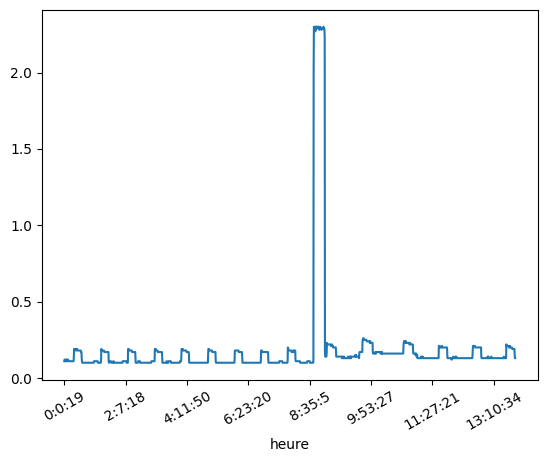

In [106]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [107]:
conso_day['heure']


1271446      0:0:19
1271447      0:0:48
1271448      0:1:18
1271449      0:1:49
1271450      0:2:21
             ...   
1273279    13:43:35
1273280    13:43:53
1273281    13:44:17
1273282    13:44:45
1273283    13:45:13
Name: heure, Length: 1838, dtype: object

In [108]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:19',
              days   kWh
  heure                 
  0:0:19  03/08/24  0.11),
 ('0:0:48',
              days   kWh
  heure                 
  0:0:48  03/08/24  0.12),
 ('0:1:18',
              days   kWh
  heure                 
  0:1:18  03/08/24  0.12),
 ('0:1:49',
              days   kWh
  heure                 
  0:1:49  03/08/24  0.12),
 ('0:2:21',
              days   kWh
  heure                 
  0:2:21  03/08/24  0.11),
 ('0:2:52',
              days   kWh
  heure                 
  0:2:52  03/08/24  0.12),
 ('0:3:23',
              days   kWh
  heure                 
  0:3:23  03/08/24  0.12),
 ('0:3:54',
              days   kWh
  heure                 
  0:3:54  03/08/24  0.12),
 ('0:4:25',
              days   kWh
  heure                 
  0:4:25  03/08/24  0.12),
 ('0:4:57',
              days   kWh
  heure                 
  0:4:57  03/08/24  0.11),
 ('0:5:28',
              days   kWh
  heure                 
  0:5:28  03/08/24  0.12),
 ('0:5:59',
         

In [109]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:19',
  heure
  0:0:19    0.11
  Name: kWh, dtype: float64),
 ('0:0:48',
  heure
  0:0:48    0.12
  Name: kWh, dtype: float64),
 ('0:1:18',
  heure
  0:1:18    0.12
  Name: kWh, dtype: float64),
 ('0:1:49',
  heure
  0:1:49    0.12
  Name: kWh, dtype: float64),
 ('0:2:21',
  heure
  0:2:21    0.11
  Name: kWh, dtype: float64),
 ('0:2:52',
  heure
  0:2:52    0.12
  Name: kWh, dtype: float64),
 ('0:3:23',
  heure
  0:3:23    0.12
  Name: kWh, dtype: float64),
 ('0:3:54',
  heure
  0:3:54    0.12
  Name: kWh, dtype: float64),
 ('0:4:25',
  heure
  0:4:25    0.12
  Name: kWh, dtype: float64),
 ('0:4:57',
  heure
  0:4:57    0.11
  Name: kWh, dtype: float64),
 ('0:5:28',
  heure
  0:5:28    0.12
  Name: kWh, dtype: float64),
 ('0:5:59',
  heure
  0:5:59    0.11
  Name: kWh, dtype: float64),
 ('0:6:31',
  heure
  0:6:31    0.12
  Name: kWh, dtype: float64),
 ('0:7:2',
  heure
  0:7:2    0.12
  Name: kWh, dtype: float64),
 ('0:7:33',
  heure
  0:7:33    0.12
  Name: kWh, dtype: float64

In [110]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:19,32779,0.11,32.779,109.826413,29998191602,2024-08-03 00:00:19.057063,03/08/24
0:0:48,29388,0.12,29.388,122.498979,29998220990,2024-08-03 00:00:48.445063,03/08/24
0:1:18,30098,0.12,30.098,119.609276,29998251088,2024-08-03 00:01:18.543063,03/08/24
0:1:49,31161,0.12,31.161,115.529027,29998282249,2024-08-03 00:01:49.704063,03/08/24
0:2:21,31344,0.11,31.344,114.854518,29998313593,2024-08-03 00:02:21.048063,03/08/24
...,...,...,...,...,...,...,...
13:43:35,18588,0.19,18.588,193.673338,30047587935,2024-08-03 13:43:35.390063,03/08/24
13:43:53,18564,0.19,18.564,193.923723,30047606499,2024-08-03 13:43:53.954063,03/08/24
13:44:17,23509,0.15,23.509,153.132843,30047630008,2024-08-03 13:44:17.463063,03/08/24


In [111]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [112]:
df.iloc[0].dates

Timestamp('2024-08-03 00:00:19.057063')

In [113]:
df.dates.dt.time

heure
0:0:19      00:00:19.057063
0:0:48      00:00:48.445063
0:1:18      00:01:18.543063
0:1:49      00:01:49.704063
0:2:21      00:02:21.048063
                 ...       
13:43:35    13:43:35.390063
13:43:53    13:43:53.954063
13:44:17    13:44:17.463063
13:44:45    13:44:45.868063
13:45:13    13:45:13.589063
Name: dates, Length: 1838, dtype: object

In [114]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [115]:
tranches = len(df)//1000
tranches+1

2

In [116]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-08-03 00:00:19.057063	2024-08-03 08:34:31.944063	8h 34m 12s 	1000
2024-08-03 08:34:31.944063	2024-08-03 13:45:13.589063	5h 10m 41s 	838


In [117]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('13:45:33', 1.838, 1838)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1838 entries, 0:0:19 to 13:45:13
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1838 non-null   int64         
 1   kWh        1838 non-null   float64       
 2   sec        1838 non-null   float64       
 3   Wh         1838 non-null   float64       
 4   cumul(ms)  1838 non-null   int64         
 5   dates      1838 non-null   datetime64[ns]
 6   days       1838 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 179.4+ KB


In [119]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [120]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 349 entries, 21/08/23 to 03/08/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     349 non-null    float64
dtypes: float64(1)
memory usage: 5.5+ KB


In [121]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [122]:
df_grp.tail(7)

,kWh
days,
28/07/24,2.881
29/07/24,3.073
30/07/24,3.677
31/07/24,3.690
01/08/24,3.867
02/08/24,3.033
03/08/24,1.838


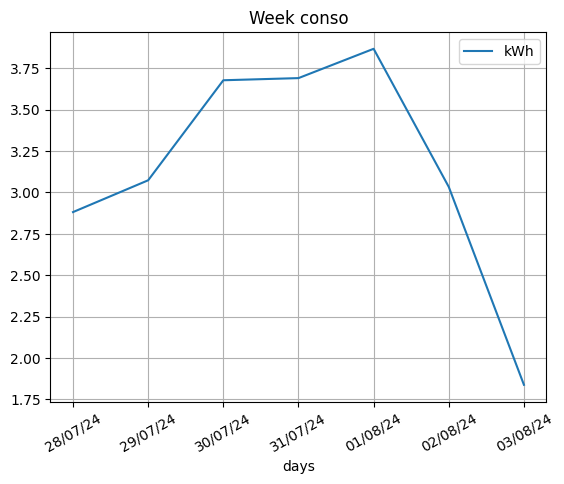

In [123]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [124]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [125]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


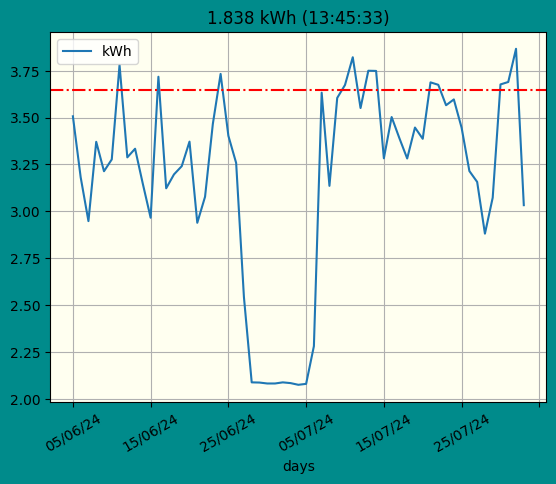

In [126]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [127]:
df_grp.mean()

kWh    3.648378
dtype: float64

In [128]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
21/07/24,3.688
22/07/24,3.675
23/07/24,3.566
24/07/24,3.597
25/07/24,3.446
26/07/24,3.215
27/07/24,3.157
28/07/24,2.881
29/07/24,3.073


In [129]:
df_grp

,kWh
days,
21/08/23,0.825
22/08/23,3.700
23/08/23,4.232
24/08/23,3.675
25/08/23,4.190
...,...
30/07/24,3.677
31/07/24,3.690
01/08/24,3.867


In [130]:
df_grp.tail(100).mean()

kWh    3.33707
dtype: float64

<Axes: xlabel='days'>

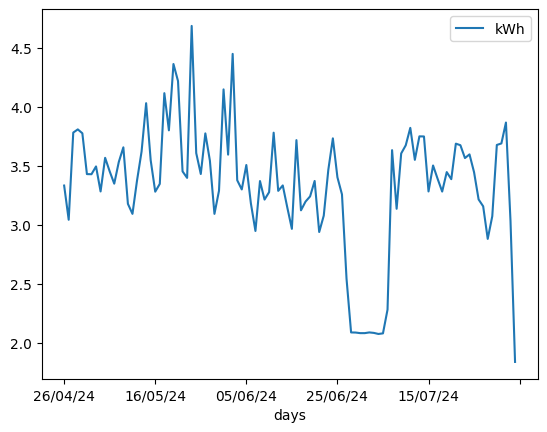

In [131]:
df_grp.tail(100).plot()

In [132]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,3.340433
std,0.476370
min,2.075000
25%,3.171500
50%,3.475000
75%,3.674750
max,3.867000


In [133]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

01/08/24 3.867
04/07/24 2.075


In [134]:
day

'03/08/24'

In [135]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1271446,32779,0.11,32.779,109.826413,29998191602,2024-08-03 00:00:19.057063,03/08/24,0:0:19
1271447,29388,0.12,29.388,122.498979,29998220990,2024-08-03 00:00:48.445063,03/08/24,0:0:48
1271448,30098,0.12,30.098,119.609276,29998251088,2024-08-03 00:01:18.543063,03/08/24,0:1:18
1271449,31161,0.12,31.161,115.529027,29998282249,2024-08-03 00:01:49.704063,03/08/24,0:1:49
1271450,31344,0.11,31.344,114.854518,29998313593,2024-08-03 00:02:21.048063,03/08/24,0:2:21
...,...,...,...,...,...,...,...,...
1273279,18588,0.19,18.588,193.673338,30047587935,2024-08-03 13:43:35.390063,03/08/24,13:43:35
1273280,18564,0.19,18.564,193.923723,30047606499,2024-08-03 13:43:53.954063,03/08/24,13:43:53
1273281,23509,0.15,23.509,153.132843,30047630008,2024-08-03 13:44:17.463063,03/08/24,13:44:17
1273282,28405,0.13,28.405,126.738250,30047658413,2024-08-03 13:44:45.868063,03/08/24,13:44:45


In [136]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1838 entries, 1271446 to 1273283
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1838 non-null   int64         
 1   kWh        1838 non-null   float64       
 2   sec        1838 non-null   float64       
 3   Wh         1838 non-null   float64       
 4   cumul(ms)  1838 non-null   int64         
 5   dates      1838 non-null   datetime64[ns]
 6   days       1838 non-null   object        
 7   heure      1838 non-null   object        
 8   hours      1838 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 143.6+ KB


In [137]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1271446    00  0.11
  1271447    00  0.12
  1271448    00  0.12
  1271449    00  0.12
  1271450    00  0.11
  ...       ...   ...
  1271561    00  0.10
  1271562    00  0.10
  1271563    00  0.10
  1271564    00  0.10
  1271565    00  0.10
  
  [120 rows x 2 columns]),
 ('01',
          hours   kWh
  1271566    01  0.10
  1271567    01  0.11
  1271568    01  0.11
  1271569    01  0.11
  1271570    01  0.11
  ...       ...   ...
  1271678    01  0.10
  1271679    01  0.10
  1271680    01  0.10
  1271681    01  0.10
  1271682    01  0.10
  
  [117 rows x 2 columns]),
 ('02',
          hours   kWh
  1271683    02  0.10
  1271684    02  0.11
  1271685    02  0.11
  1271686    02  0.11
  1271687    02  0.11
  ...       ...   ...
  1271795    02  0.10
  1271796    02  0.10
  1271797    02  0.10
  1271798    02  0.10
  1271799    02  0.10
  
  [117 rows x 2 columns]),
 ('03',
          hours   kWh
  1271800    03  0.10
  1271801    03  0.11
  1271802    03  0.1

In [138]:
groupedbyhour.count()

,kWh
hours,
00,120
01,117
02,117
03,116
04,115
05,117
06,116
07,118
08,174


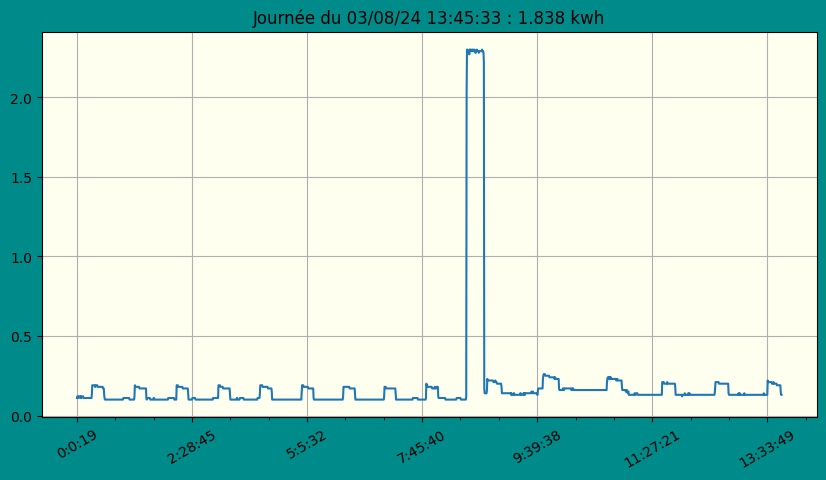

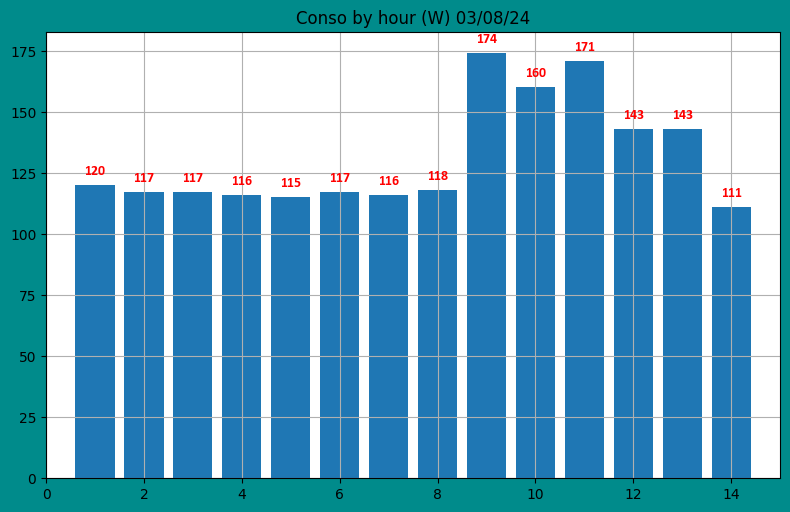

In [139]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [140]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [141]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [142]:
#conso_byhour(day)

In [143]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

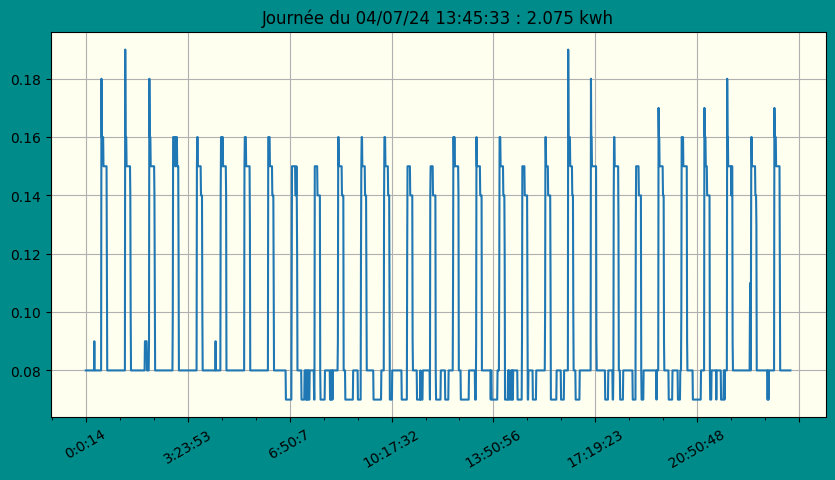

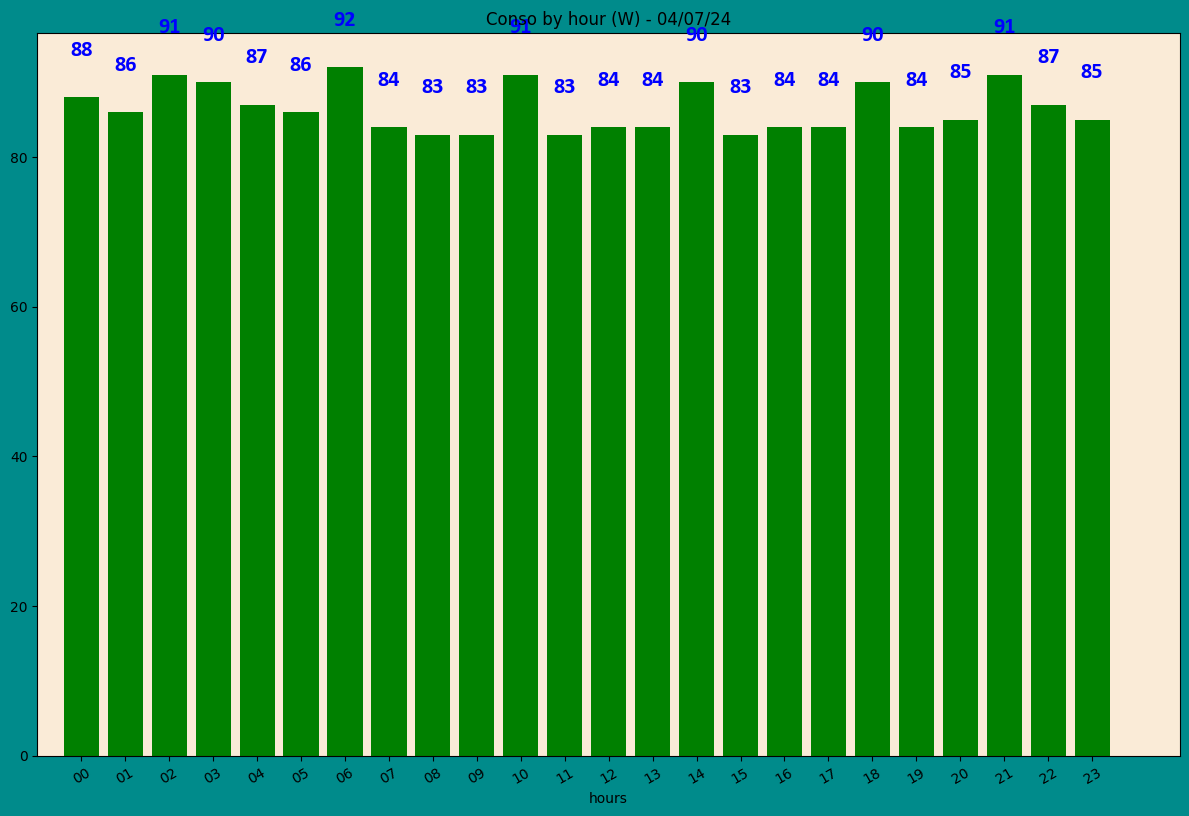

In [144]:
# plot any day
day = '04/07/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [145]:
month

days
04/07/24    2.075
05/07/24    2.080
06/07/24    2.281
07/07/24    3.633
08/07/24    3.136
09/07/24    3.605
10/07/24    3.674
11/07/24    3.822
12/07/24    3.551
13/07/24    3.750
14/07/24    3.749
15/07/24    3.283
16/07/24    3.503
17/07/24    3.390
18/07/24    3.282
19/07/24    3.447
20/07/24    3.387
21/07/24    3.688
22/07/24    3.675
23/07/24    3.566
24/07/24    3.597
25/07/24    3.446
26/07/24    3.215
27/07/24    3.157
28/07/24    2.881
29/07/24    3.073
30/07/24    3.677
31/07/24    3.690
01/08/24    3.867
02/08/24    3.033
Name: kWh, dtype: float64

In [146]:
month.idxmax()

'01/08/24'

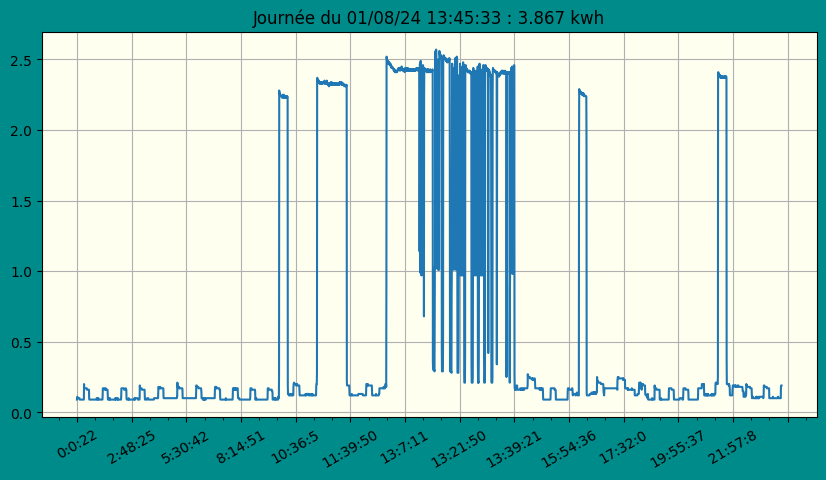

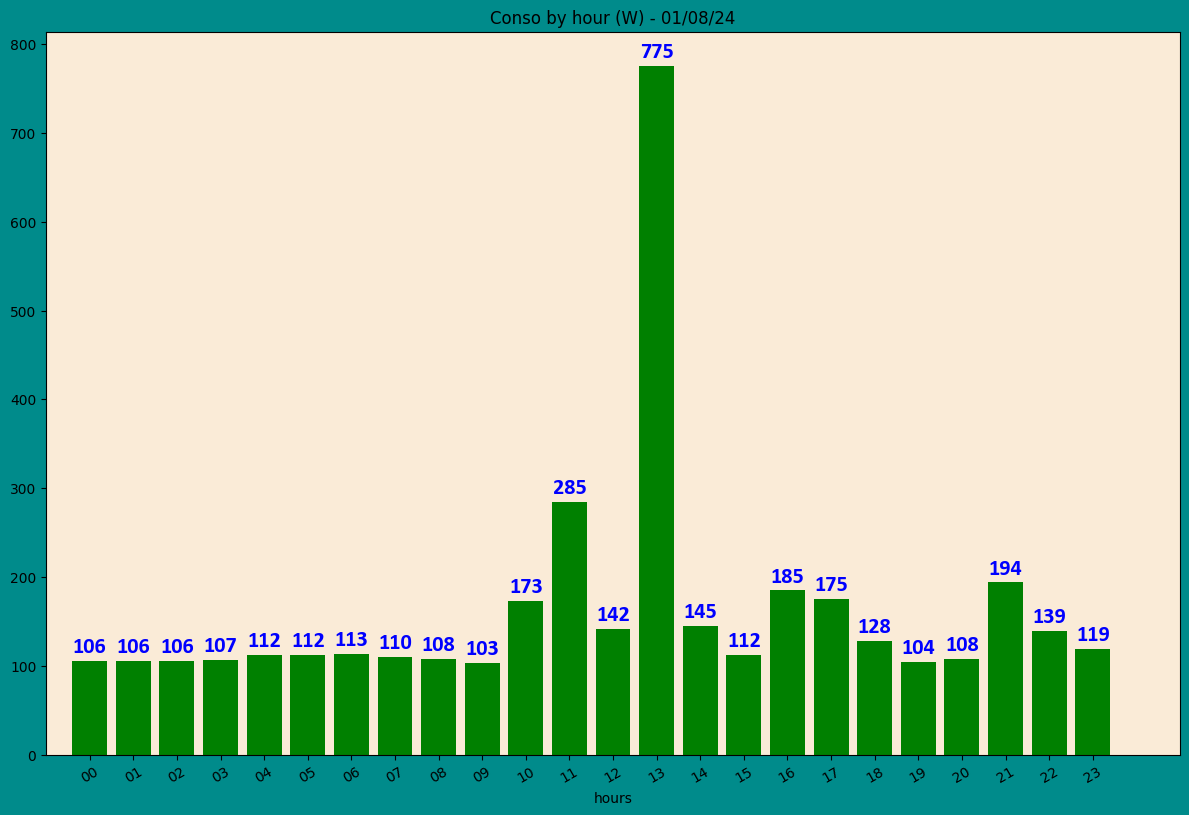

In [147]:
# plot month day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [148]:
filename='conso_data.csv'
#conso_data.to_csv(filename)